In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import time

from classification.evaluation import (
    performance_indices,
    binary_classification,
    roc_analysis,
)
from classification.inputs import hparams
from classification.training import training_model, training_history
from glob import glob
from IPython.display import display, clear_output

np.set_printoptions(precision=4, suppress=True)

plt.style.use("seaborn-v0_8-paper")
plt.style.use("styles/l3_mod.mplstyle")

tf.random.set_seed(13)
np.random.seed(13)

In [2]:
data_folder = "001points"
data_path = os.path.join("data", "experimental", "classification", data_folder)

train_files = glob(os.path.join(data_path, "train_data*.csv"))
valid_files = glob(os.path.join(data_path, "valid_data*.csv"))

train_data = pd.read_csv(train_files[0])
valid_data = pd.read_csv(valid_files[0])

print(f"train: {train_data.shape}, valid: {valid_data.shape}")

train: (1111, 34), valid: (139, 34)


In [3]:
# training
hparams = [
    {
        "model_id": "Modelo #1",
        "hidden_layers": [],
        "activation": tf.keras.activations.relu,
    },
    {
        "model_id": "Modelo #2",
        "hidden_layers": [32],
        "activation": tf.keras.activations.relu,
    },
    {
        "model_id": "Modelo #3",
        "hidden_layers": [128],
        "activation": tf.keras.activations.relu,
    },
    {
        "model_id": "Modelo #4",
        "hidden_layers": [32, 32, 32],
        "activation": tf.keras.activations.swish,
    },
    {
        "model_id": "Modelo #5",
        "hidden_layers": [32, 32, 32],
        "activation": tf.keras.activations.relu,
    },
    {
        "model_id": "Modelo #6",
        "hidden_layers": [128, 128, 128],
        "activation": tf.keras.activations.relu
    },
]

results = []
for hp in hparams:
    r = training_model(train_files, valid_files, **hp)
    clear_output(wait=True)
    results.append(r)
    time.sleep(1)

  0%|          | 0/10 [00:00<?, ?it/s]

Modelo: {'hidden_layers': [128, 128, 128], 'activation': <function relu at 0x00000251F03B4700>}
Epoch 1/500
35/35 [==============================] - 1s 3ms/step - loss: 0.8655 - categorical_accuracy: 0.6499 - val_loss: 0.5662 - val_categorical_accuracy: 0.8345 - lr: 0.0010
Epoch 2/500
35/35 [==============================] - 0s 1ms/step - loss: 0.3453 - categorical_accuracy: 0.9010 - val_loss: 0.2769 - val_categorical_accuracy: 0.8993 - lr: 0.0010
Epoch 3/500
35/35 [==============================] - 0s 1ms/step - loss: 0.2343 - categorical_accuracy: 0.9109 - val_loss: 0.2430 - val_categorical_accuracy: 0.9065 - lr: 0.0010
Epoch 4/500
35/35 [==============================] - 0s 1ms/step - loss: 0.2003 - categorical_accuracy: 0.9253 - val_loss: 0.2744 - val_categorical_accuracy: 0.8705 - lr: 0.0010
Epoch 5/500
35/35 [==============================] - 0s 1ms/step - loss: 0.1837 - categorical_accuracy: 0.9325 - val_loss: 0.2309 - val_categorical_accuracy: 0.9065 - lr: 0.0010
Epoch 6/500
35

,model,hidden_layers,activation
0,Modelo #1,[],<function relu at 0x00000251F03B4700>
1,Modelo #2,[32],<function relu at 0x00000251F03B4700>
2,Modelo #3,[128],<function relu at 0x00000251F03B4700>
3,Modelo #4,"[32, 32, 32]",<function swish at 0x00000251F03B4550>
4,Modelo #5,"[32, 32, 32]",<function relu at 0x00000251F03B4700>
5,Modelo #6,"[128, 128, 128]",<function relu at 0x00000251F03B4700>


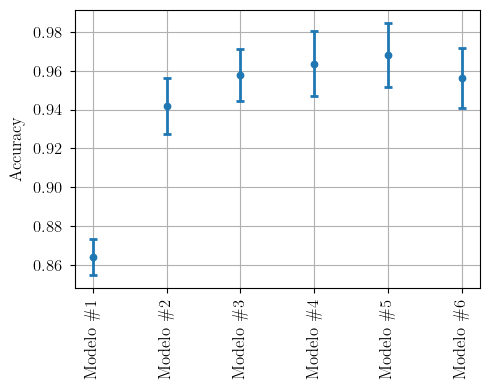

In [8]:
indices = performance_indices(results, valid_files)

sp_index = indices["sp_index"]

f, ax = plt.subplots(figsize=(5, 4))

labels = [hp["model_id"].replace("#", "\#") for hp in hparams]
x = [i + 1 for i in np.arange(len(results))]
y = sp_index.mean(axis=0)
yerr = sp_index.std(axis=0)
ax.errorbar(x, y, yerr, fmt="o", elinewidth=2.0, capsize=3.0, capthick=2.0)
ax.grid()
ax.set_ylabel("Accuracy")
ax.set_xticks(x, labels, rotation=90, ha="center")

df = pd.DataFrame.from_records(hparams)
df["model"] = [hp["model_id"] for hp in hparams]
display(df[["model", "hidden_layers", "activation"]])
plt.show()

In [5]:
# training_history(results[0])

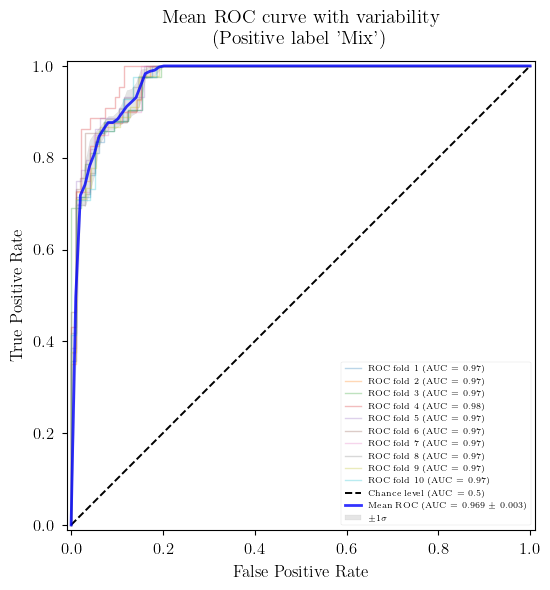

In [14]:
roc_analysis(results, valid_files, label=1, model_id=0, figsize=(6, 6))